<a href="https://colab.research.google.com/github/anthonyosei/Mental-Health-Prediction-with-Machine-Learning-in-Tech/blob/main/Mental_Health_in_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING MODELS**

#**Import Dependencies**

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc
from xgboost.sklearn import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from scipy import stats
from scipy.stats import randint
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping



In [ ]:
# locate drive and mount the storage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the dataset into the notebook
filename = '/content/drive/MyDrive/MentalHealthPredictionProject - Copy/cleaned_df.csv'
df = pd.read_csv(filename)

In [ ]:
# display the dataframe
df


,Is self-employed,Comp_employees,Works at a tech company,Do you have previous employers,fam_mh_illness,prev_mh,Has MHD,diagnosed_mh,So:What_diagnosis?,Sought_mh_treat,Age,Gender,Age Group,Country live,US State live,Country work,US State work,Work position,Work remotely,Response
0,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Not eligible for coverage / N/A
1,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,No response
2,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,No
3,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,No
4,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,I don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59803,False,100-500,True,False,I don't know,Yes,Yes,False,No disorder,False,25,Trans/Other,20-25,Other,NaN,Other,NaN,Other,Sometimes,Somewhat open
59804,False,100-500,True,False,I don't know,Yes,Yes,False,No disorder,False,25,Trans/Other,20-25,Other,NaN,Other,NaN,Other,Sometimes,Maybe/Not sure
59805,False,100-500,True,False,I don't know,Yes,Yes,False,No disorder,False,25,Trans/Other,20-25,Other,NaN,Other,NaN,Other,Sometimes,No
59806,False,100-500,True,False,I don't know,Yes,Yes,False,No disorder,False,25,Trans/Other,20-25,Other,NaN,Other,NaN,Other,Sometimes,Not applicable to me


In [ ]:
# Fill the Null entries in USA State with 'No US State'
df['US State live'] = df['US State live'].fillna('No US State')
df['US State work'] = df['US State work'].fillna('No US State')

In [ ]:
# Data Encoding
labelDict = {}
for feature in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

# reference at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

label_Is self-employed [False, True]
label_Comp_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_Works at a tech company [False, True, nan]
label_Do you have previous employers [False, True]
label_fam_mh_illness ["I don't know", 'No', 'Yes']
label_prev_mh ['Maybe', 'No', 'Yes']
label_Has MHD ['Maybe', 'No', 'Yes']
label_diagnosed_mh [False, True]
label_So:What_diagnosis? ['ADD ', 'Addictive Disorder', 'Anxiety Disorder ', 'Asperger Syndrome', 'Attention Deficit Hyperactivity Disorder', 'Autism ', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety', 'Autism Spectrum Disorder', 'Burn out', 'Depression', 'Eating Disorder ', 'Gender Identity Disorder', 'Mood Disorder ', 'No disorder', 'Obsessive-Compulsive Disorder', 'PDD-NOS', 'Personality Disorder ', 'Post-traumatic Stress Disorder', 'Psychotic Disorder ', 'Schizotypal Personality Disorder', 'Seasonal Affective Disorder', 'Stress Response Syndromes', 'Substance Use Disorde

In [ ]:
# Get rid of response
df.drop(columns='Response')

,Is self-employed,Comp_employees,Works at a tech company,Do you have previous employers,fam_mh_illness,prev_mh,Has MHD,diagnosed_mh,So:What_diagnosis?,Sought_mh_treat,Age,Gender,Age Group,Country live,US State live,Country work,US State work,Work position,Work remotely
0,0,2,1,1,1,2,1,1,2,0,20,1,3,1,30,1,31,1,2
1,0,2,1,1,1,2,1,1,2,0,20,1,3,1,30,1,31,1,2
2,0,2,1,1,1,2,1,1,2,0,20,1,3,1,30,1,31,1,2
3,0,2,1,1,1,2,1,1,2,0,20,1,3,1,30,1,31,1,2
4,0,2,1,1,1,2,1,1,2,0,20,1,3,1,30,1,31,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59803,0,1,1,0,0,2,2,0,13,0,6,2,0,0,30,0,31,11,2
59804,0,1,1,0,0,2,2,0,13,0,6,2,0,0,30,0,31,11,2
59805,0,1,1,0,0,2,2,0,13,0,6,2,0,0,30,0,31,11,2
59806,0,1,1,0,0,2,2,0,13,0,6,2,0,0,30,0,31,11,2


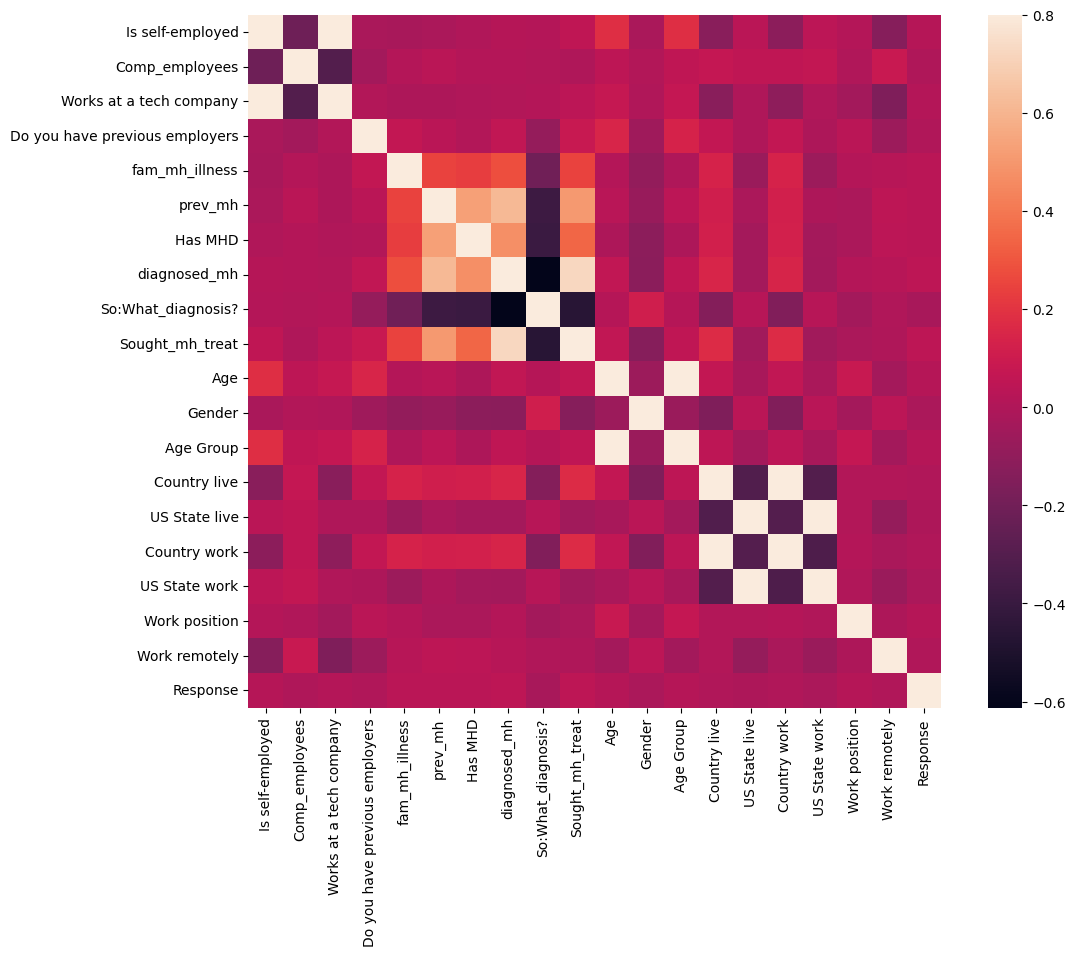

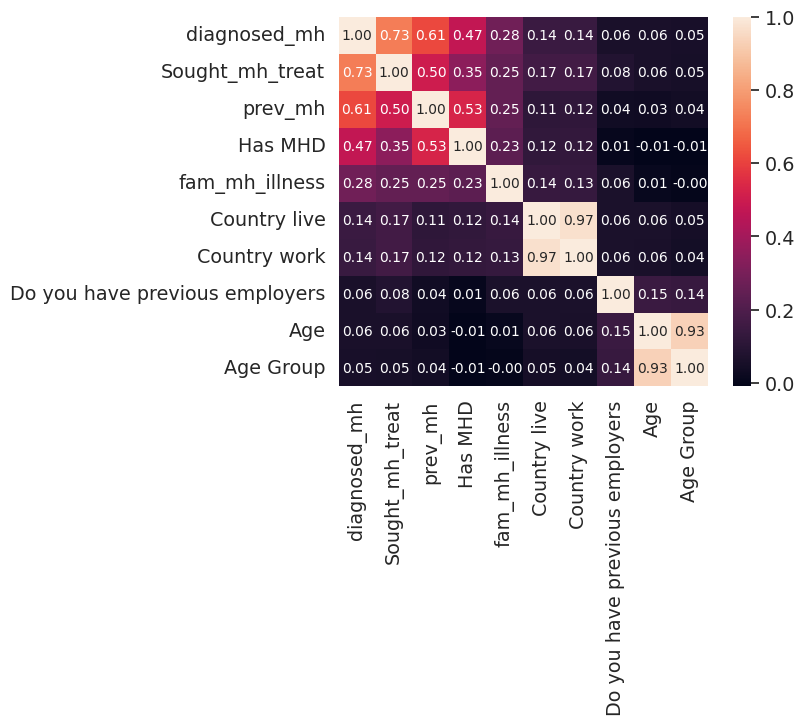

In [ ]:
# find the correlation and plot heatmap
correl = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correl, vmax=.8, square=True);
plt.show()

#Diagnosed Mental Health correlation matrix
k = 10 #number of variables for heatmap
cols = correl.nlargest(k, 'diagnosed_mh')['diagnosed_mh'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We are going to scale the following columns since they are extremely different from the other columns

-AGE
-US STATE LIVE
-US STATE WORK
-WORK POSITION

In [ ]:
# Scaling Age
scaler = MinMaxScaler()
features = ['Age', 'Work Position']

In [ ]:
# Check the number of unique values in the dataframe
df.nunique()

Is self-employed                     2
Comp_employees                       6
Works at a tech company              3
Do you have previous employers       2
fam_mh_illness                       3
prev_mh                              3
Has MHD                              3
diagnosed_mh                         2
So:What_diagnosis?                  25
Sought_mh_treat                      2
Age                                 44
Gender                               3
Age Group                           10
Country live                         3
US State live                       48
Country work                         3
US State work                       49
Work position                       15
Work remotely                        3
Response                          2065
dtype: int64

In [ ]:
# Scale and tranform 'Age' and 'Work position' columns
for i in df.columns:
    if i == 'Age' or i == 'Work position':
        df[i] = scaler.fit_transform(df[[i]])

df.head()

,Is self-employed,Comp_employees,Works at a tech company,Do you have previous employers,fam_mh_illness,prev_mh,Has MHD,diagnosed_mh,So:What_diagnosis?,Sought_mh_treat,Age,Gender,Age Group,Country live,US State live,Country work,US State work,Work position,Work remotely,Response
0,0,2,1,1,1,2,1,1,2,0,0.465116,1,3,1,30,1,31,0.071429,2,1383
1,0,2,1,1,1,2,1,1,2,0,0.465116,1,3,1,30,1,31,0.071429,2,1352
2,0,2,1,1,1,2,1,1,2,0,0.465116,1,3,1,30,1,31,0.071429,2,1341
3,0,2,1,1,1,2,1,1,2,0,0.465116,1,3,1,30,1,31,0.071429,2,1341
4,0,2,1,1,1,2,1,1,2,0,0.465116,1,3,1,30,1,31,0.071429,2,465


FEATURES TO USE AS X
- IS SELF-EMPLOYED
- WORKS AT A TECH COMPANY
- FAM_MH_ILLNESS
- prev_mh
- HAS MHD
- AGE
- GENDER
- WORK REMOTELY
- WORK POSITION

In [ ]:
features = ['Is self-employed', 'Works at a tech company', 'fam_mh_illness', 'prev_mh', 'Has MHD','Age','Gender','Work position','Work remotely']

In [ ]:
x = df[features]
y = df['diagnosed_mh']

In [ ]:
#display x features
x

,Is self-employed,Works at a tech company,fam_mh_illness,prev_mh,Has MHD,Age,Gender,Work position,Work remotely
0,0,1,1,2,1,0.465116,1,0.071429,2
1,0,1,1,2,1,0.465116,1,0.071429,2
2,0,1,1,2,1,0.465116,1,0.071429,2
3,0,1,1,2,1,0.465116,1,0.071429,2
4,0,1,1,2,1,0.465116,1,0.071429,2
...,...,...,...,...,...,...,...,...,...
59803,0,1,0,2,2,0.139535,2,0.785714,2
59804,0,1,0,2,2,0.139535,2,0.785714,2
59805,0,1,0,2,2,0.139535,2,0.785714,2
59806,0,1,0,2,2,0.139535,2,0.785714,2


##**Split Training and Testing**



In [ ]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



The code above splits the dataset in x and y into training and testing set. In machine learning , this is common to prepare both the data for training and evaluation
The TRAIN TEST function prevents overfitting and underfitting by testing the model with unbiased, unseen data. Using this function, we ensure that our model can perform consistently when making predictions.



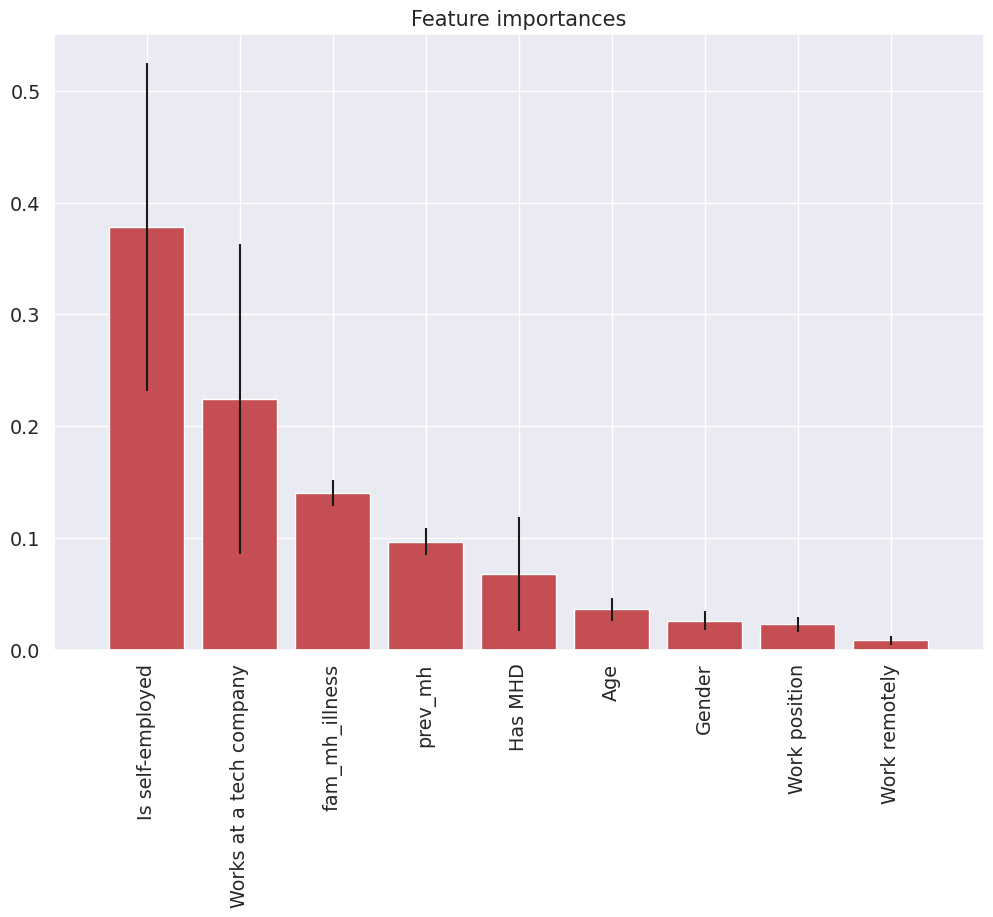

In [ ]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=2500,
                              random_state=42)

forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(x.shape[1]):
    labels.append(features[f])

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), labels, rotation='vertical')
plt.xlim([-1, x.shape[1]])
plt.show()

In [ ]:
def evaluation_func(model, y_test, y_pred, plot=False):
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred)*100, "%")

    #Null accuracy:
    print('Null accuracy:\n', y_test.value_counts())

    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())

    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())

    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred[0:25])


    #Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Classification Accuracy:', accuracy)

    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - accuracy)

    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)

    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred))


    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))

    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, x, y, cv=10, scoring='roc_auc').mean())

    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]

    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)

        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        plt.savefig('Histogram_plot')


    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred = binarize(y_pred_prob, threshold=0.3)[0]

    # Apply binarization
    #y_pred = binarizer.transform(y_pred_prob)[:, 0]

    #y_pred = binarize(y_pred_prob, 0.3)[0]

    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################



    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)


    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()

        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.savefig('ROC_curve')
        plt.show()

    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    #setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)



    return accuracy

#**MACHINE LEARNING MODELS**

In [ ]:
method = {}
rmse = ()

##**RANDOM FOREST CLASSIFIER**

In [ ]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(x, y)
    rand.cv_results_

    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)

    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(x, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [ ]:
rf_results=[]
def rf_classifier():
    # store the model
    forest = RandomForestClassifier(n_estimators = 20)

    # set the parameters for the random forest model
    featuresSize = features.__len__()
    param_dist = {"max_depth": [3, None],"max_features": randint(1, featuresSize),"min_samples_split": randint(2, 9),"min_samples_leaf": randint(1, 9),"criterion": ["gini", "entropy"]}

    # Tune the model with already defined Randomised Search CV
    tuningRandomizedSearchCV(forest, param_dist)

    # Building the model
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)

    rf_model = forest.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred = rf_model.predict(X_test)

    # store the prediction and convert to dataframe
    rf_results = pd.DataFrame({'Index': X_test.index, 'Has Diagnosed Mental Health': y_pred})

    print('********************Results********************')
    print(rf_results)
    rf_results.to_csv('rf_results.csv', index=False)

    print('########### Random Forests ###############')

    accuracy_score = evaluation_func(rf_model, y_test, y_pred, True)

    #Data for final graph
    method['R. Forest'] = accuracy_score * 100

Rand. Best Score:  0.8904493437692045
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 8}
[0.89, 0.888, 0.89, 0.89, 0.89, 0.889, 0.89, 0.889, 0.889, 0.89, 0.89, 0.89, 0.889, 0.891, 0.889, 0.89, 0.89, 0.89, 0.891, 0.89]
********************Results********************
       Index  Has Diagnosed Mental Health
0       6769                            0
1      19913                            1
2      49122                            1
3      11524                            1
4       1554                            0
...      ...                          ...
11957  44341                            1
11958  56089                            1
11959  24433                            1
11960  27368                            1
11961   3161                            0

[11962 rows x 2 columns]
########### Random Forests ###############
Accuracy: 99.63216853369002 %
Null accuracy:
 diagnosed_mh
0    6096
1    5866
Name: 

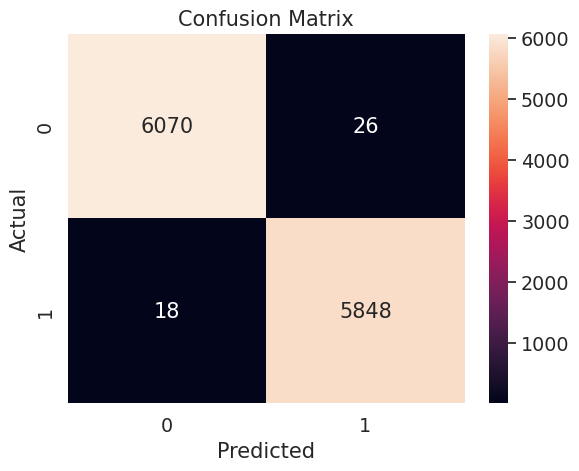

Classification Accuracy: 0.9963216853369001
Classification Error: 0.0036783146630998687
False Positive Rate: 0.00426509186351706
Precision: 0.9955737146748382
AUC Score: 0.9963331888108258
Cross-validated AUC: 0.901851212982655
First 10 predicted responses:
 [0 1 1 1 0 0 0 1 0 1]
First 10 predicted probabilities of class members:
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
First 10 predicted probabilities:
 [[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]]


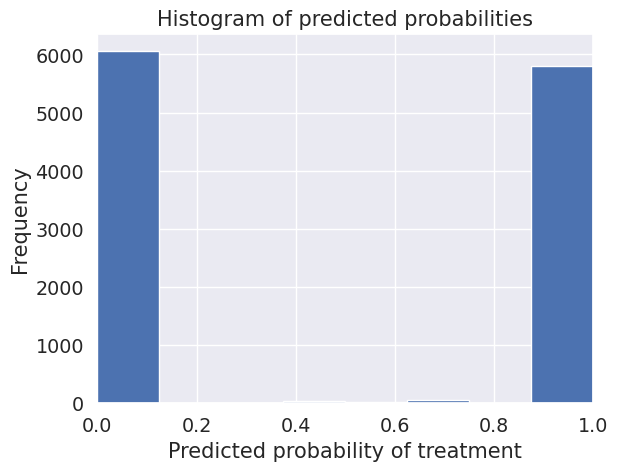

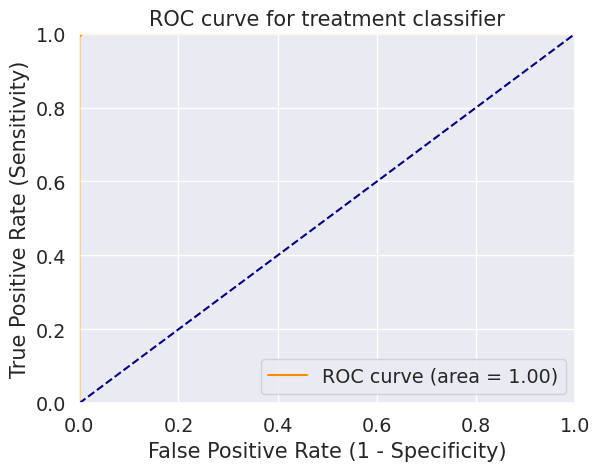

[[6070   26]
 [  18 5848]]


In [ ]:
rf_classifier()

## **KNeighbors Classifier**

In [ ]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)

    # From https://github.com/justmarkham/scikit-learn-videos/blob/master/08_grid_search.ipynb
    #tuningCV(knn)
    #tuningGridSerach(knn)
    #tuningMultParam(knn)

    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)

    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred = knn.predict(X_test)

    print('########### KNeighborsClassifier ###############')

    accuracy_score = evaluation_func(knn, y_test, y_pred, True)

    #Data for final graph
    method['KNN'] = accuracy_score * 100

Rand. Best Score:  0.8174152598054374
Rand. Best Params:  {'weights': 'distance', 'n_neighbors': 16}
[0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817]
########### KNeighborsClassifier ###############
Accuracy: 99.65724795184752 %
Null accuracy:
 diagnosed_mh
0    6096
1    5866
Name: count, dtype: int64
Percentage of ones: 0.4903862230396255
Percentage of zeros: 0.5096137769603746
True: [0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1]
Pred: [0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1]


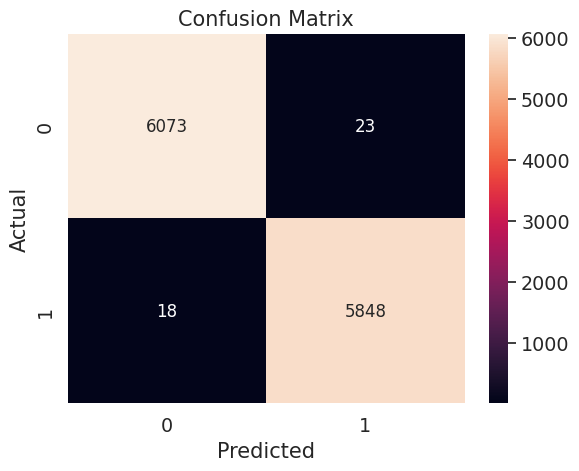

Classification Accuracy: 0.9965724795184752
Classification Error: 0.0034275204815248372
False Positive Rate: 0.003772965879265092
Precision: 0.9960824391074774
AUC Score: 0.9965792518029518
Cross-validated AUC: 0.8173216495187763
First 10 predicted responses:
 [0 1 1 1 0 0 0 1 0 1]
First 10 predicted probabilities of class members:
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
First 10 predicted probabilities:
 [[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]]


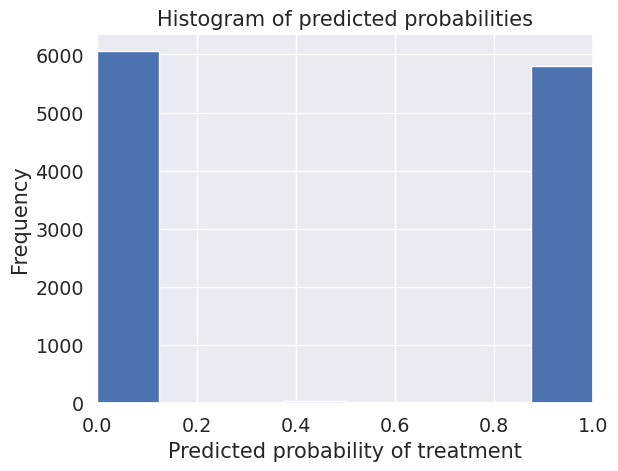

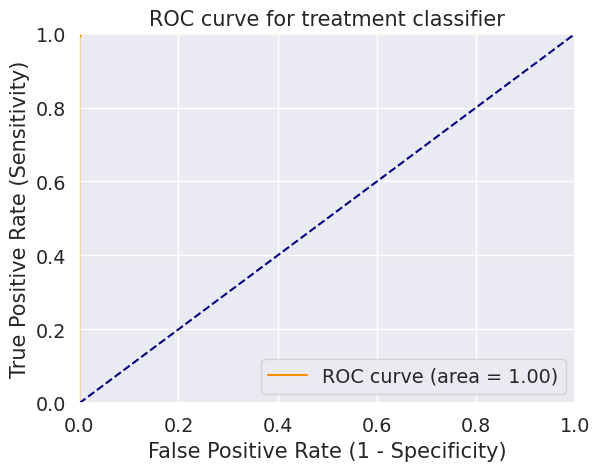

[[6073   23]
 [  18 5848]]


In [ ]:
Knn()

##**Logistic Regression**

In [ ]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred = logreg.predict(X_test)

    print('########### Logistic Regression ###############')

    accuracy_score = evaluation_func(logreg, y_test, y_pred, True)

    #Data for final graph
    method['Log. Regres.'] = accuracy_score * 100

########### Logistic Regression ###############
Accuracy: 86.42367497074068 %
Null accuracy:
 diagnosed_mh
0    6096
1    5866
Name: count, dtype: int64
Percentage of ones: 0.4903862230396255
Percentage of zeros: 0.5096137769603746
True: [0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1]
Pred: [1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1]


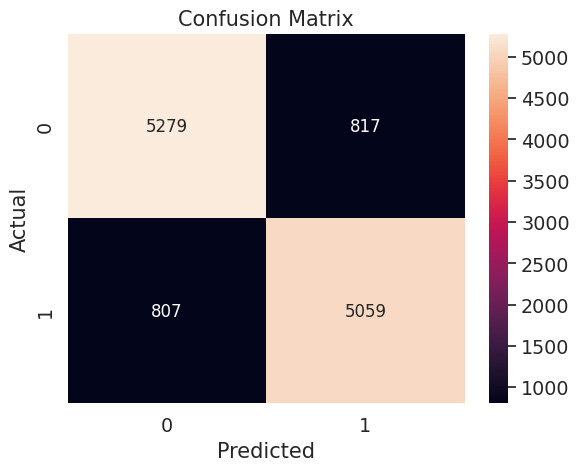

Classification Accuracy: 0.8642367497074068
Classification Error: 0.13576325029259317
False Positive Rate: 0.1340223097112861
Precision: 0.8609598366235535
AUC Score: 0.8642026194368903
Cross-validated AUC: 0.880808395565358
First 10 predicted responses:
 [1 1 0 0 0 0 0 1 0 1]
First 10 predicted probabilities of class members:
 [[0.12507385 0.87492615]
 [0.10999004 0.89000996]
 [0.78921254 0.21078746]
 [0.94738485 0.05261515]
 [0.8787354  0.1212646 ]
 [0.68161527 0.31838473]
 [0.78729344 0.21270656]
 [0.12443682 0.87556318]
 [0.72808591 0.27191409]
 [0.27629423 0.72370577]]
First 10 predicted probabilities:
 [[0.87492615]
 [0.89000996]
 [0.21078746]
 [0.05261515]
 [0.1212646 ]
 [0.31838473]
 [0.21270656]
 [0.87556318]
 [0.27191409]
 [0.72370577]]


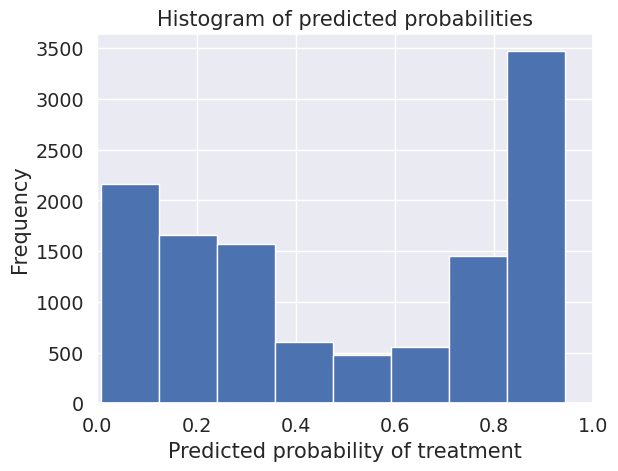

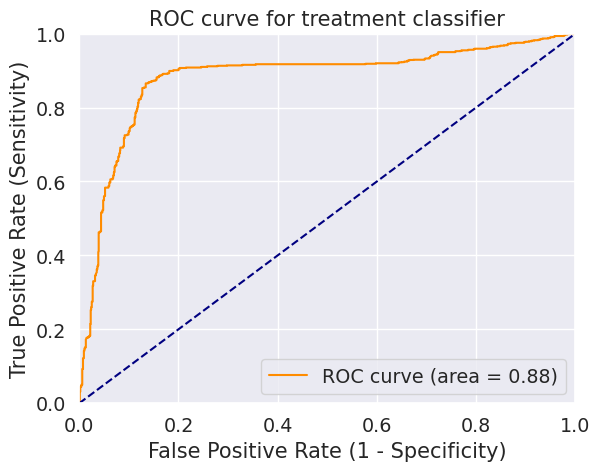

[[5279  817]
 [ 807 5059]]


In [ ]:
logisticRegression()

##**Decision Tree Classifier**

In [ ]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = features.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)

    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred = tree.predict(X_test)

    print('########### Tree classifier ###############')

    accuracy_score = evaluation_func(tree, y_test, y_pred, True)

    #Data for final graph
    method['Tree clas.'] = accuracy_score * 100

Rand. Best Score:  0.8897470026320807
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 6, 'min_samples_split': 8}
[0.867, 0.889, 0.89, 0.89, 0.89, 0.865, 0.891, 0.869, 0.888, 0.88, 0.888, 0.887, 0.891, 0.879, 0.891, 0.888, 0.89, 0.879, 0.89, 0.891]
########### Tree classifier ###############
Accuracy: 88.77278047149306 %
Null accuracy:
 diagnosed_mh
0    6096
1    5866
Name: count, dtype: int64
Percentage of ones: 0.4903862230396255
Percentage of zeros: 0.5096137769603746
True: [0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1]
Pred: [1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1]


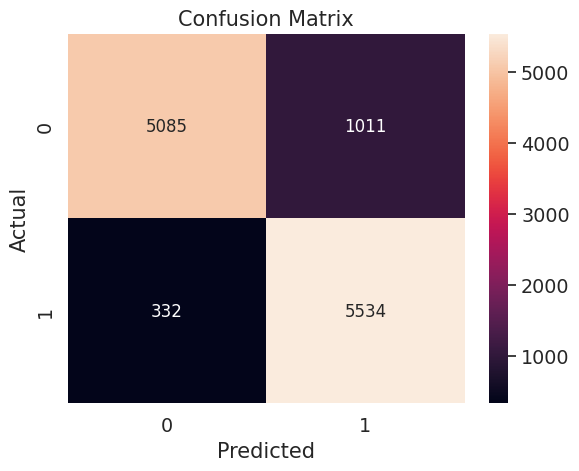

Classification Accuracy: 0.8877278047149306
Classification Error: 0.11227219528506938
False Positive Rate: 0.1658464566929134
Precision: 0.8455309396485867
AUC Score: 0.8887781013500997
Cross-validated AUC: 0.9122501075941823
First 10 predicted responses:
 [1 1 0 1 0 0 0 1 0 1]
First 10 predicted probabilities of class members:
 [[0.14621914 0.85378086]
 [0.0726078  0.9273922 ]
 [0.9901132  0.0098868 ]
 [0.3029525  0.6970475 ]
 [0.9901132  0.0098868 ]
 [0.9901132  0.0098868 ]
 [0.9901132  0.0098868 ]
 [0.0726078  0.9273922 ]
 [0.9901132  0.0098868 ]
 [0.14621914 0.85378086]]
First 10 predicted probabilities:
 [[0.85378086]
 [0.9273922 ]
 [0.0098868 ]
 [0.6970475 ]
 [0.0098868 ]
 [0.0098868 ]
 [0.0098868 ]
 [0.9273922 ]
 [0.0098868 ]
 [0.85378086]]


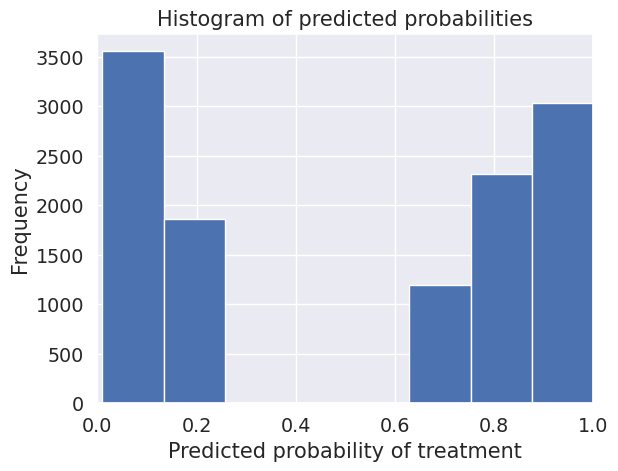

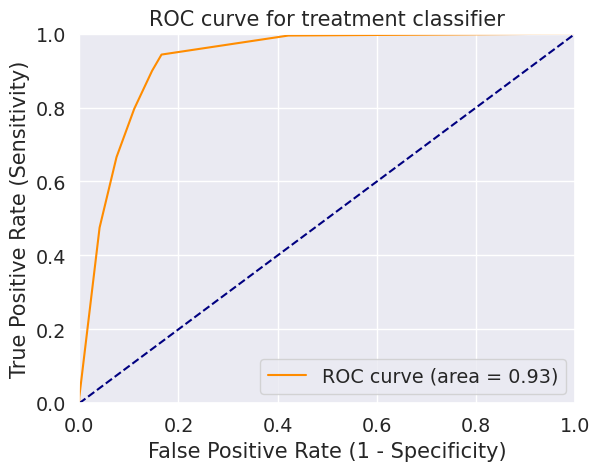

[[5085 1011]
 [ 332 5534]]


In [ ]:
treeClassifier()

##**Using Artificial Neural Networks**





In [ ]:
import tensorflow as tf

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) # O/P
model.compile(optimizer='rmsprop', loss='mse')

# add an early stop to the epochs
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)


# fit the model to the training data and add 200 epochs with 10% validation split
history = model.fit(x = X_train, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])

# display the summary of the model
model.summary()




Epoch 1/200
1346/1346 [==============================] - 3s 2ms/step - loss: 0.1020 - val_loss: 0.0862
Epoch 2/200
1346/1346 [==============================] - 3s 2ms/step - loss: 0.0822 - val_loss: 0.0814
Epoch 3/200
1346/1346 [==============================] - 3s 2ms/step - loss: 0.0789 - val_loss: 0.0781
Epoch 4/200
1346/1346 [==============================] - 3s 2ms/step - loss: 0.0767 - val_loss: 0.0768
Epoch 5/200
1346/1346 [==============================] - 2s 2ms/step - loss: 0.0747 - val_loss: 0.0752
Epoch 6/200
1346/1346 [==============================] - 2s 2ms/step - loss: 0.0730 - val_loss: 0.0722
Epoch 7/200
1346/1346 [==============================] - 3s 2ms/step - loss: 0.0716 - val_loss: 0.0719
Epoch 8/200
1346/1346 [==============================] - 4s 3ms/step - loss: 0.0702 - val_loss: 0.0706
Epoch 9/200
1346/1346 [==============================] - 3s 2ms/step - loss: 0.0691 - val_loss: 0.0729
Epoch 10/200
1346/1346 [==============================] - 2s 2ms/step - l

In [ ]:
def Ann_Evaluation():
  y_pred = model.predict(X_test)
  y_pred = (y_pred >= 0.5).astype(int)

  print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

  print('Null accuracy:\n', y_test.value_counts())

        # calculate the percentage of ones
  print('Percentage of ones:', y_test.mean())

        # calculate the percentage of zeros
  print('Percentage of zeros:',1 - y_test.mean())

        #Comparing the true and predicted response values
  print('True:', y_test.values[0:25])
  print('Pred:', y_pred[0:25])

        #Confusion matrix
        # save confusion matrix and slice into four pieces
  confusion = metrics.confusion_matrix(y_test, y_pred)
        #[row, column]
  TP = confusion[1, 1]
  TN = confusion[0, 0]
  FP = confusion[0, 1]
  FN = confusion[1, 0]

        # visualize Confusion Matrix
  sns.heatmap(confusion,annot=True,fmt="d")
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  # Calculate the accuracy score
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print('Classification Accuracy:', accuracy)

  # Calculate the Classification Error
  print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred))

  # Calculate the False Positive Rate
  false_positive_rate = FP / float(TN + FP)
  print('False Positive Rate:', false_positive_rate)

  # Claculate the Precision of the data
  print('Precision:', metrics.precision_score(y_test, y_pred))


    # Calculate roc_auc_score
  print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
  print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
  print('First 10 predicted probabilities of class members:\n', y_pred[:10])


  y_pred_prob = y_pred

  # Plot the Histogram of the predicted probabilities
  plt.rcParams['font.size'] = 12
          # 8 bins
  plt.hist(y_pred_prob, bins=8)

          # x-axis limit from 0 to 1
  plt.xlim(0,1)
  plt.title('Histogram of predicted probabilities')
  plt.xlabel('Predicted probability of Diagnosed Mental Health')
  plt.ylabel('Frequency')
  plt.savefig('Ann_Histogram')


      #Predict if the probability is greater than 0.3
  y_pred_prob = y_pred_prob.reshape(-1,1)
  y_pred = binarize(y_pred_prob, threshold=0.3)[0]



      # print the first 10 predicted probabilities
  print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

      #AUC is the percentage of the ROC plot that is underneath the curve
      #Higher value = better classifier
  roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)




  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

  # Plot the ROC_Curve
  plt.figure()

  plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.rcParams['font.size'] = 12
  plt.title('ROC curve for treatment classifier')
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.legend(loc="lower right")
  plt.savefig('ANN_ROC Curve')
  plt.show()

  method['Neural Network'] = accuracy * 100

    # define a function that accepts a threshold and prints sensitivity and specificity
  def evaluate_threshold(threshold):

    print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

        # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0) # list dictionary if statement
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
  return accuracy

374/374 [==============================] - 2s 4ms/step
Accuracy: 0.9362146798194282
Null accuracy:
 diagnosed_mh
0    6096
1    5866
Name: count, dtype: int64
Percentage of ones: 0.4903862230396255
Percentage of zeros: 0.5096137769603746
True: [0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1]
Pred: [[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]


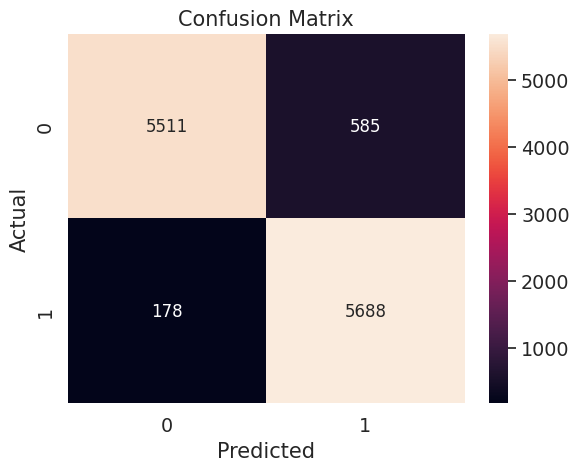

Classification Accuracy: 0.9362146798194282
Classification Error: 0.06378532018057181
False Positive Rate: 0.09596456692913385
Precision: 0.9067431850789096
AUC Score: 0.9368455378787676
374/374 [==============================] - 1s 2ms/step
First 10 predicted responses:
 [[ 0.91622424]
 [ 1.1182159 ]
 [ 0.8121848 ]
 [ 1.0356091 ]
 [-0.01213624]
 [-0.030674  ]
 [-0.0804899 ]
 [ 1.0205922 ]
 [ 0.03543601]
 [ 0.8948394 ]]
First 10 predicted probabilities of class members:
 [[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]]
First 10 predicted probabilities:
 [[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]]


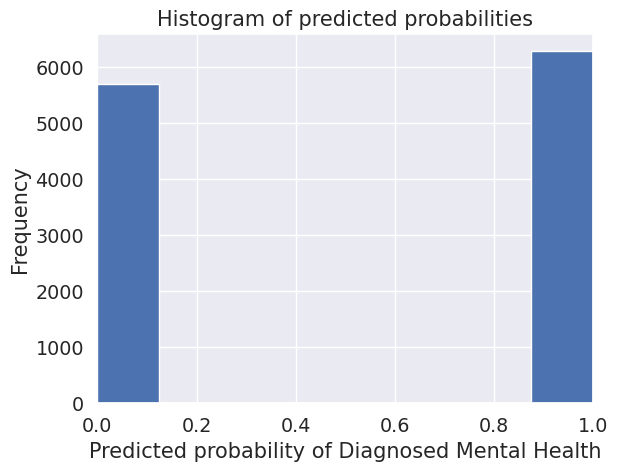

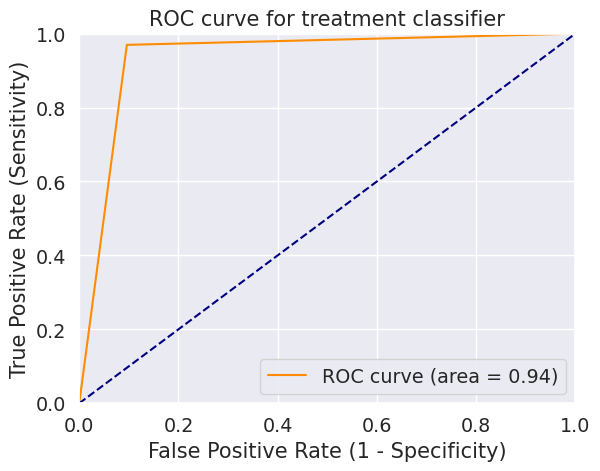

0.9362146798194282

In [ ]:
Ann_Evaluation()

#### COMPARING MODELS

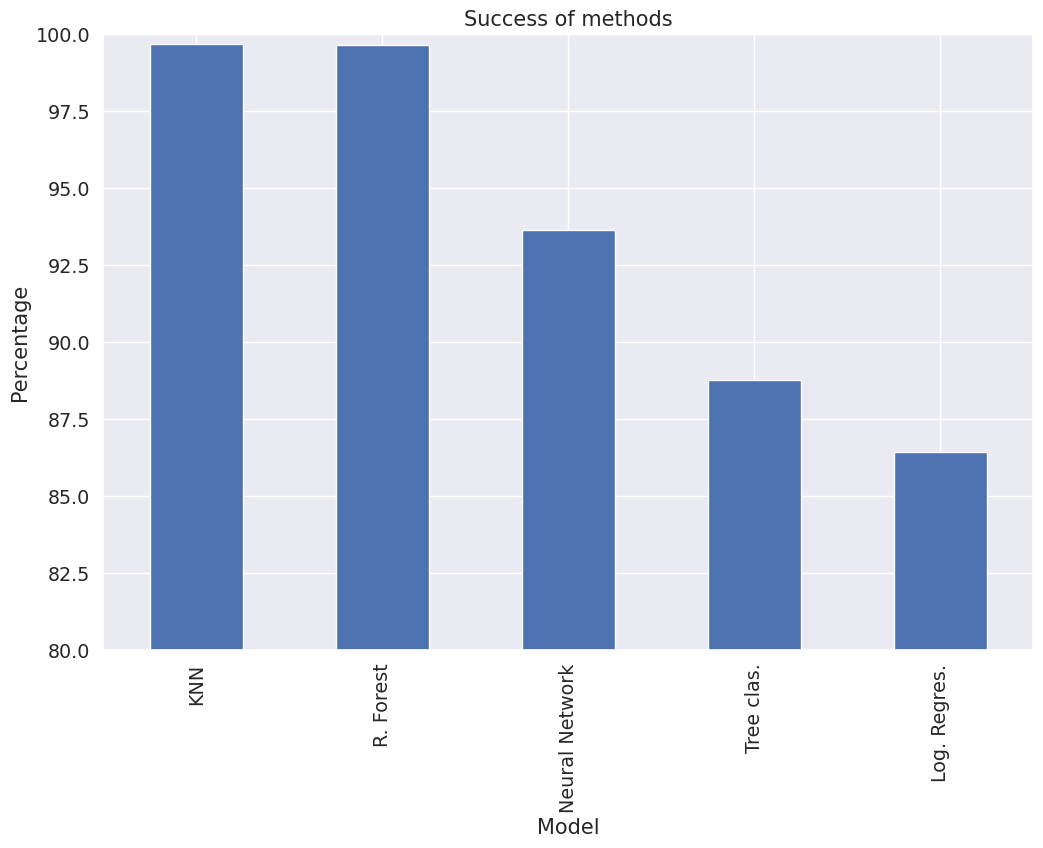

In [ ]:
# Store and read the models dictionary as a pandas series
model_s = pd.Series(method)


# Sort the values in the models
model_s = model_s.sort_values(ascending=False)
plt.figure(figsize=(12,8))




axis = model_s.plot(kind='bar')
for p in axis.patches:
  # indicating the accuracy level of the models
  ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.ylim([80.0, 100.0])
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Success of methods')
plt.savefig('model_success')
plt.show()
